In [2]:
## Square flipping


In [3]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [4]:
delta = 0.1
L = 20 
N = 150 
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)

In [5]:
def kronecker(i,j):
    return 1 if i==j else 0

def V1(z):
    return -10 if(-5<z<-1) else 0

def V2(z):
    return(-10.0 if(-5<z<-1 or 1<z<5) else 0)

def h1(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V1(delta*i) * kronecker(i,j)

def h2(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V2(delta*i) * kronecker(i,j)



In [6]:
H1 = np.array( [[h1(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H1_eigenvalues, H1_eigenvectors = lin.eig(H1)
idx = H1_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H1_eigenvalues = H1_eigenvalues[idx] # Sorted eigenvalues
H1_eigenvectors = H1_eigenvectors[:,idx] # Sorted eigenvectors

In [7]:
H2 = np.array( [[h2(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H2_eigenvalues, H2_eigenvectors = lin.eig(H2)
jdx = H2_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H2_eigenvalues = H2_eigenvalues[jdx] # Sorted eigenvalues
H2_eigenvectors = H2_eigenvectors[:,jdx] # Sorted eigenvectors

In [8]:
evec=H1_eigenvectors[:,0]  # Sorted eigenvectors

In [9]:
potential1 = 0.09*np.array([V1(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points
potential2 = 0.09*np.array([V2(delta*i) for i in range(-N,N+1)])

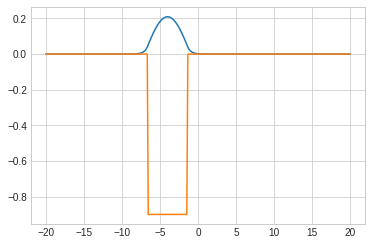

In [10]:
plt.plot(x,evec)
plt.plot(x,potential1)

In [11]:
def Psi1(t):
    sum1 = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(evec, H2_eigenvectors[:,n]) # nth expansion coefficient 
        E = H2_eigenvalues[n]
        sum1 += c * np.exp(-E*t*1.0j) * H2_eigenvectors[:,n]
    return sum1

def Prob1(t):
    return np.array( [abs(Psi1(t)[i])**2 for i in range(dimension)])

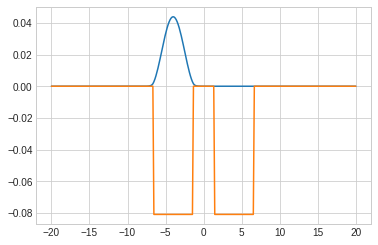

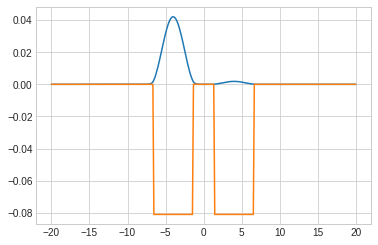

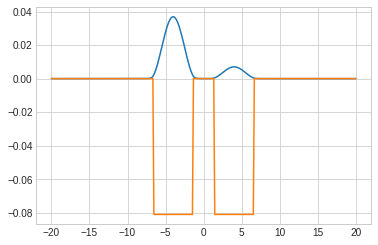

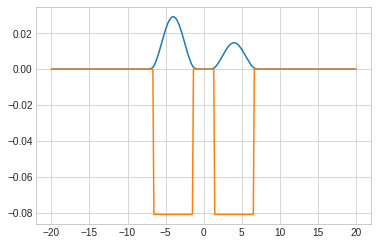

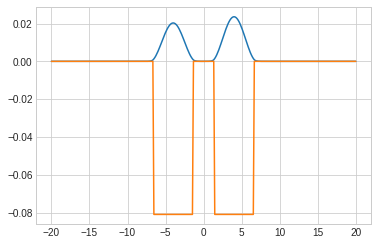

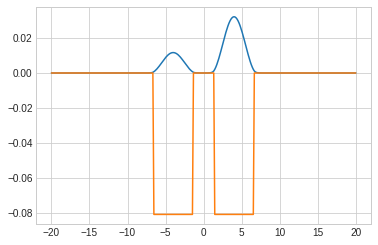

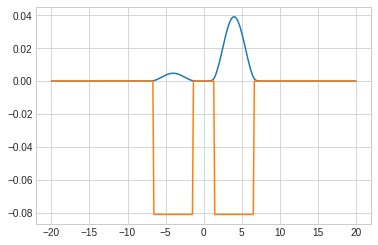

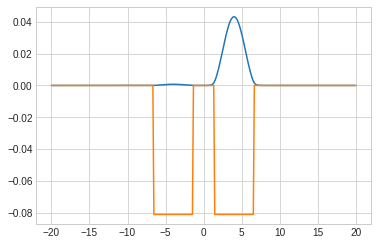

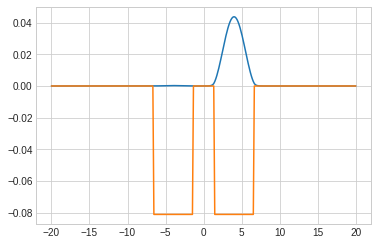

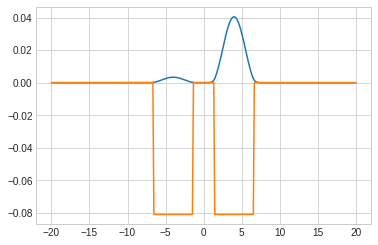

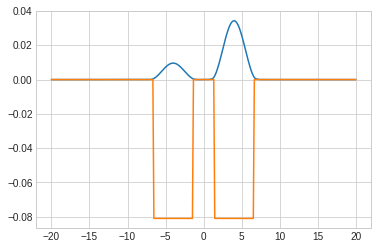

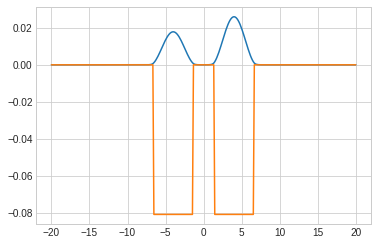

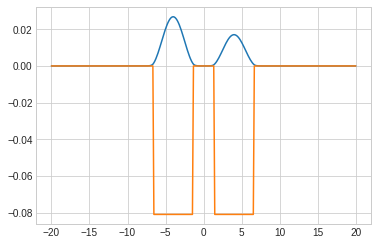

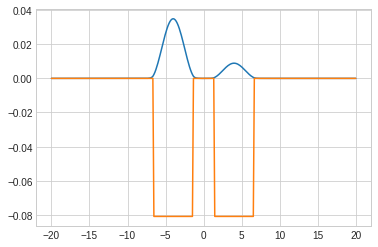

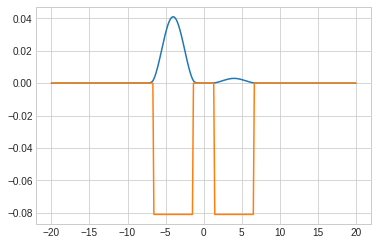

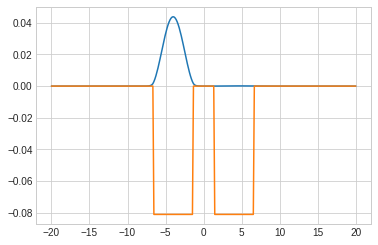

In [12]:
for i in range(16):
  plt.plot(x, Prob1(i*1000))
  plt.plot(x,0.09*potential2)
  plt.show()